# Phys 41 Homework 3 Jake Anderson 2/1/2024

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

## Problem 1: Generating random numbers

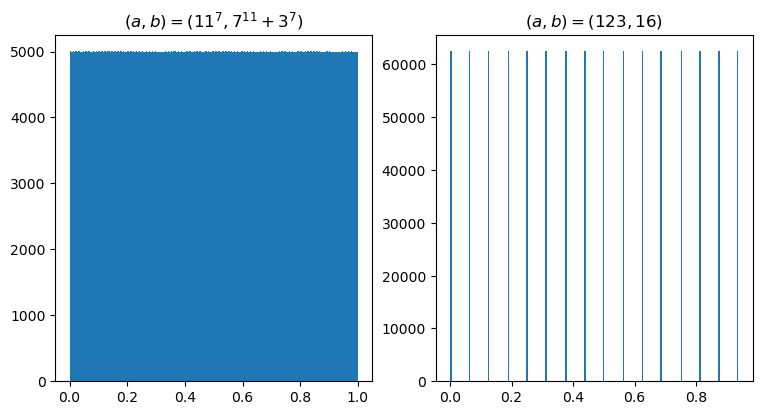

In [2]:
def random_uniform(a, b, seed):
    return ((a * seed) % b) / b


seeds = np.arange(1e6)
good_sample = random_uniform(11**7, 7**11 + 3**7, seeds)
bad_sample = random_uniform(123, 16, seeds)
fig, ax1 = plt.subplots(figsize=(9, 4.5), nrows=1, ncols=2)
ax1[0].hist(good_sample, bins=200)
ax1[1].hist(bad_sample, bins=200)
ax1[0].set_title(r"$(a,b)=(11^7,7^{11}+3^7)$")
ax1[1].set_title(r"$(a,b)=(123,16)$")
fig.show()

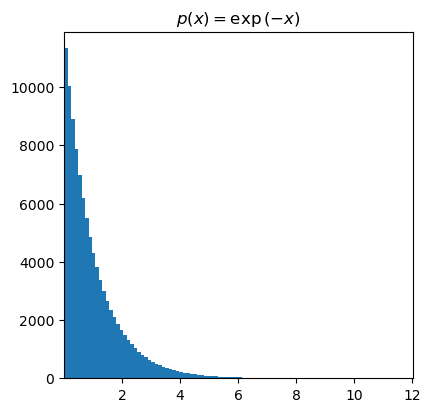

In [3]:
def random_poisson(N):
    # Create two sets of unique integer seeds
    seeds1, seeds2 = tuple([time.time() + np.arange(0, N) for _ in range(2)])

    # Create set of uniformly random values in range (0, 1e2)
    # Here we are approximating p(1e2)=3.7e-44 as zero
    x = random_uniform(11**7, 7**11 + 3**7, seeds1) * 1e2

    # Create set of probabilities of values x occurring
    y = np.exp(-1 * x)

    # Create set of uniformly random values in range (0, 1)
    # Here we slightly change the values of a and b passed to random_uniform;
    # this makes the two uniform distributions more independent
    y_temp = random_uniform(11**7 - 12345, 7**11 + 3**7 - 12345, seeds2)

    # If the random value in y_temp is less the value in y, we accept that x value
    valid = y_temp < y
    return x[valid]


fig = plt.figure(figsize=(4.5, 4.5))
sample = random_poisson(1e7)
plt.hist(sample, bins=100)
plt.xlim(min(sample), max(sample))
plt.title(r"$p(x)=\exp{(-x)}$")
fig.show()

## Problem 2: Basic matplotlib

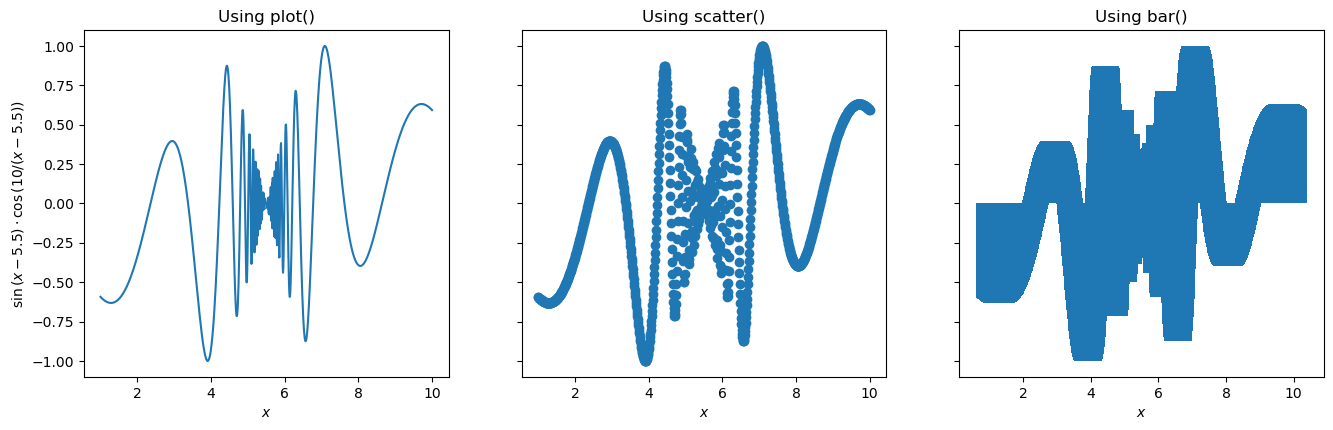

In [10]:
def function_of_x(x):
    return np.sin(x - 5.5) * np.cos(10 / (x - 5.5 + 1e-6))


fig, ax = plt.subplots(figsize=(16, 4.5), nrows=1, ncols=3)
x = np.linspace(1, 10, 1000)

ax[0].plot(x, function_of_x(x))
ax[0].set_title("Using plot()")
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$\sin{(x-5.5)}\cdot\cos{(10/(x-5.5))}$")

ax[1].scatter(x, function_of_x(x))
ax[1].set_title("Using scatter()")
ax[1].set_xlabel(r"$x$")
ax[1].set_yticklabels([])

ax[2].bar(x, function_of_x(x))
ax[2].set_title("Using bar()")
ax[2].set_xlabel(r"$x$")
ax[2].set_yticklabels([])

fig.show()

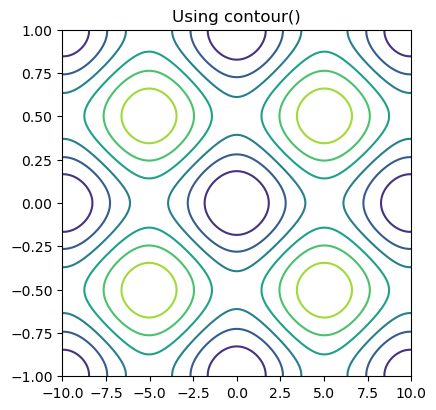

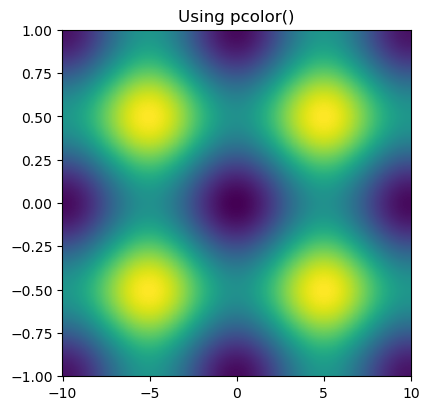

In [5]:
def function_of_xy(x, y):
    # Modified Rastrigin function
    return (
        10 * 2
        + (x / 10) ** 2
        - 10 * np.cos(2 * np.pi * (x / 10))
        + y**2
        - 10 * np.cos(2 * np.pi * y)
    )


x = np.linspace(-10, 10, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = function_of_xy(X, Y)

fig1, ax1 = plt.subplots(figsize=(4.5, 4.5), nrows=1, ncols=1)
ax1.contour(X, Y, Z)
ax1.set_title("Using contour()")
fig1.show()

fig2, ax2 = plt.subplots(figsize=(4.5, 4.5), nrows=1, ncols=1)
ax2.pcolor(X, Y, Z)
ax2.set_title("Using pcolor()")
fig2.show()

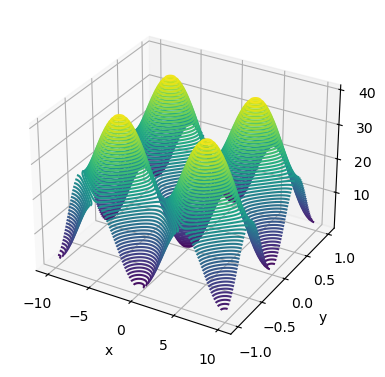

In [6]:
fig, ax = plt.subplots(
    figsize=(4.5, 4.5), nrows=1, ncols=1, subplot_kw={"projection": "3d"}
)
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.show()

## Problem 3: Reading documentation

The basic inputs of `matplotlib.axes.Axis.pie` are a 1-dimensional array (vector/list) of widths. The widths are normalized by default, so the weights just have to be relative. The function can also take in a list of hatchings and a list of colors.

The basic outputs of `matplotlib.axes.Axis.pie` are a lsit of wedge-shaped figure components of type `matplotlib.patches.Wedge`, a list of the labels transformed to the type `matplotlib.text.Text`, and another list of labels for numeric labels in the event there is a specific labelling format supplied by the `autopct` argument.

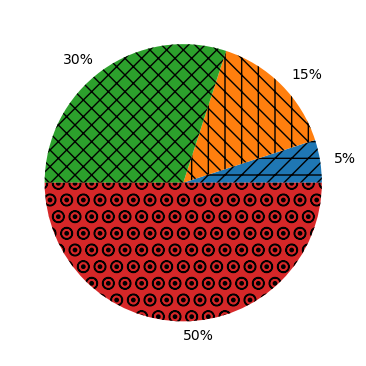

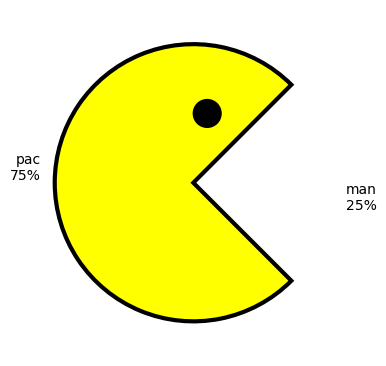

In [12]:
wedge_sizes = np.array([5, 15, 30, 50])
labels = [str(wedge_size) + "%" for wedge_size in wedge_sizes]
hatches = ["//-", "\\|\\", "XX", "O."]

fig1, ax1 = plt.subplots(figsize=(4.5, 4.5), nrows=1, ncols=1)
ax1.pie(wedge_sizes, labels=labels, hatch=hatches)
fig1.show()

fig2, ax2 = plt.subplots(figsize=(4.5, 4.5), nrows=1, ncols=1)
wedge_sizes = np.array([25, 75])
labels = ["man\n25%", "pac\n75%"]
colors = ["white", "yellow"]
wedges = ax2.pie(
    wedge_sizes,
    labels=labels,
    wedgeprops={"linewidth": 3, "linestyle": "-", "edgecolor": "black"},
    colors=colors,
    rotatelabels=True,
    startangle=-45,
)
wedges[0][0].set(linewidth=0)
eyeball = plt.Circle((0.1, 0.5), 0.1, color="black")
ax2.add_patch(eyeball)
fig2.show()

The `matplotlib.axes.Axis.pie` argument `wedgeprops` takes a dictionary containing `matplotlib.patches.Wedge` properties and gives it to all wedges in the pie chart. Here it is used to give each wedge a thick black outline. In line 21, we set the width of the outline of one of the wedges to 0, creating an open mouth for Pacman. The `startangle` argument is also used when calling `pie()` to change the total rotation of the pie chart. In this case we rotate the chart clockwise $45\degree$ to point Pacman straight ahead. We also add a circular patch generatedby `matplotlib.pyplot.Circle` to act as the eyeball.

To make a nested pie chart, we simply need to create two pie charts and make the radius of the inner one smaller.

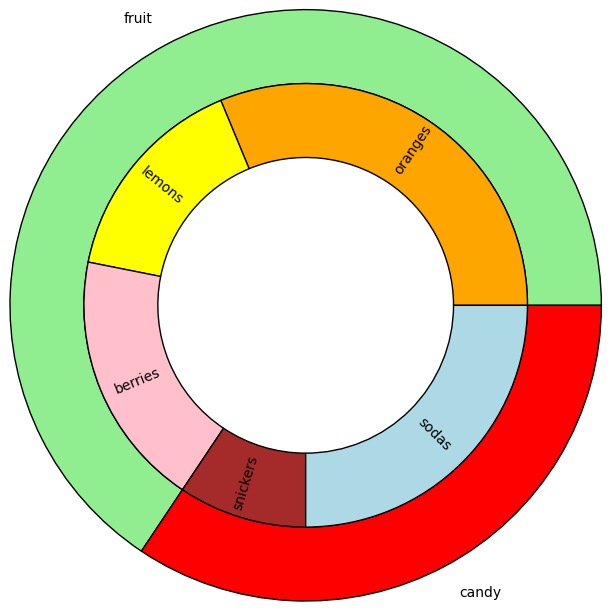

In [50]:
fig, ax = plt.subplots()

size = 0.5
data = {
    "fruit": {"oranges": 10, "lemons": 5, "berries": 6},
    "candy": {"snickers": 3, "sodas": 8},
}

outer_sizes = [sum([data[key1][key2] for key2 in data[key1].keys()]) for key1 in data.keys()]
outer_labels = data.keys()
outer_colors = ["lightgreen", "red"]
inner_sizes = []
inner_labels = []
for key1 in data.keys():
    for key2 in data[key1].keys():
        inner_sizes.append(data[key1][key2])
        inner_labels.append(key2)
        
inner_colors = ["orange", "yellow", "pink", "brown", "lightblue"]
ax.pie(outer_sizes, labels=outer_labels, radius=2, colors=outer_colors, wedgeprops={"width": size, "edgecolor": "black"})
ax.pie(inner_sizes, labels=inner_labels, radius=2-size, colors=inner_colors, rotatelabels=True, labeldistance=size+0.2, wedgeprops={"width": size, "edgecolor": "black"})
fig.show()